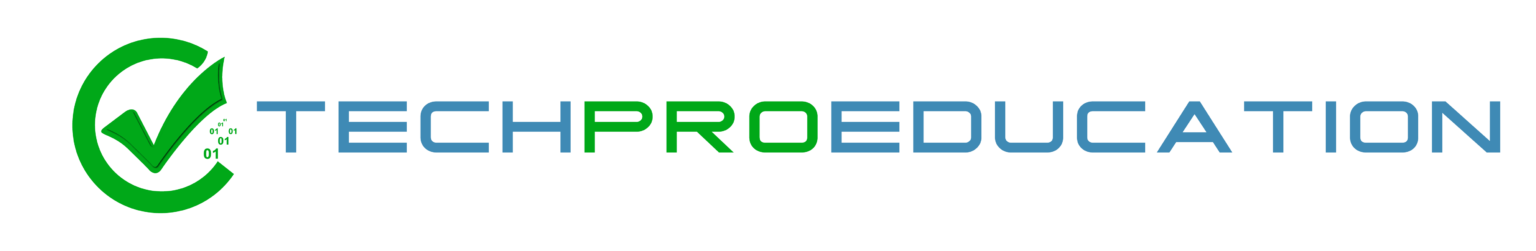

# **Adult Income Prediction**

**Data Set Information:**

This dataset was obtained from UCI Machine Learning Repository. The aim of this problem is to classify adults in two different groups based on their income where group 1 has an income less than USD 50k and group 2 has an income of more than or equal to USD 50k. The data available at hand comes from Census 1994.


**Attribute Information:**

Age: Describes the age of individuals. Continuous.

Workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

fnlwgt: Continuous.

education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

education-num: Number of years spent in education. Continuous.

marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

sex: Female, Male.

capital-gain: Continuous.

capital-loss: Continuous.

hours-per-week: Continuous.

native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

salary: >50K,<=50K

# Exploratory Data Analysis and Visualization

## Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

plt.rcParams["figure.figsize"]=(10,6)
sns.set_style("whitegrid")
pd.set_option("display.float_format", lambda x: '%.2f'  %x)

pd.options.display.max_rows=50
pd.options.display.max_columns=100

import warnings
warnings.filterwarnings("ignore")
warnings.warn("thisnwill not show")

In [2]:
df = pd.read_csv("adult.csv")
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [3]:
df.shape

(32561, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
df["income"] = df['income'].map({'<=50K': 0, '>50K': 1}).astype(int)

In [6]:
df.income.unique()

array([0, 1])

In [7]:
df.sample(20)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
15588,23,?,302836,Assoc-acdm,12,Married-civ-spouse,?,Husband,White,Male,0,0,40,El-Salvador,0
31689,48,Private,185079,HS-grad,9,Never-married,Exec-managerial,Not-in-family,White,Female,0,0,50,United-States,0
15252,23,Private,98283,Bachelors,13,Never-married,Exec-managerial,Own-child,Asian-Pac-Islander,Male,0,0,40,United-States,0
6308,27,Private,387776,Some-college,10,Never-married,Other-service,Own-child,White,Male,0,0,40,United-States,0
14649,43,Local-gov,35824,Masters,14,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,0,40,United-States,1
7659,39,Private,746786,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,55,United-States,1
10982,42,Private,445940,9th,5,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,Mexico,0
28679,17,Private,36877,10th,6,Never-married,Sales,Own-child,White,Female,0,0,10,United-States,0
16785,27,Private,204515,Bachelors,13,Never-married,Tech-support,Not-in-family,White,Female,0,0,36,United-States,0
24753,32,Private,212064,Bachelors,13,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,1


In [8]:
df.workclass.value_counts(ascending=False)

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

In [9]:
df.isin(["?"]).sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [10]:
df.workclass.replace("?", "Unknown", inplace=True)

In [11]:
df.occupation.replace("?", "Unknown", inplace=True)

In [12]:
df["native.country"].replace("?","Unknown", inplace=True)

In [13]:
df.isin(["?"]).sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  int32 
dtypes: int32(1), int64(6), object(8)
memory usage: 3.6+ MB


In [15]:
df.workclass.nunique()

9

In [16]:
df.groupby("education")["education.num"].value_counts(dropna=False)

education     education.num
10th          6                  933
11th          7                 1175
12th          8                  433
1st-4th       2                  168
5th-6th       3                  333
7th-8th       4                  646
9th           5                  514
Assoc-acdm    12                1067
Assoc-voc     11                1382
Bachelors     13                5355
Doctorate     16                 413
HS-grad       9                10501
Masters       14                1723
Preschool     1                   51
Prof-school   15                 576
Some-college  10                7291
Name: count, dtype: int64

In [17]:
df.education.nunique()

16

In [18]:
df.income.value_counts(normalize=True)

income
0   0.76
1   0.24
Name: proportion, dtype: float64

In [19]:
df.income.value_counts()

income
0    24720
1     7841
Name: count, dtype: int64

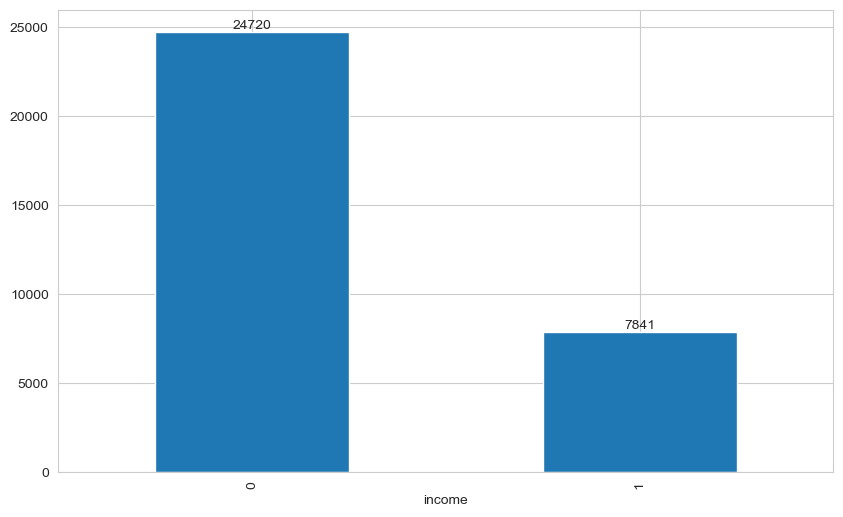

In [20]:
ax = df["income"].value_counts().plot(kind='bar')
ax.bar_label(ax.containers[0]); 

**unbalance olabilir**

In [21]:
df_numeric = df.select_dtypes(include="number")

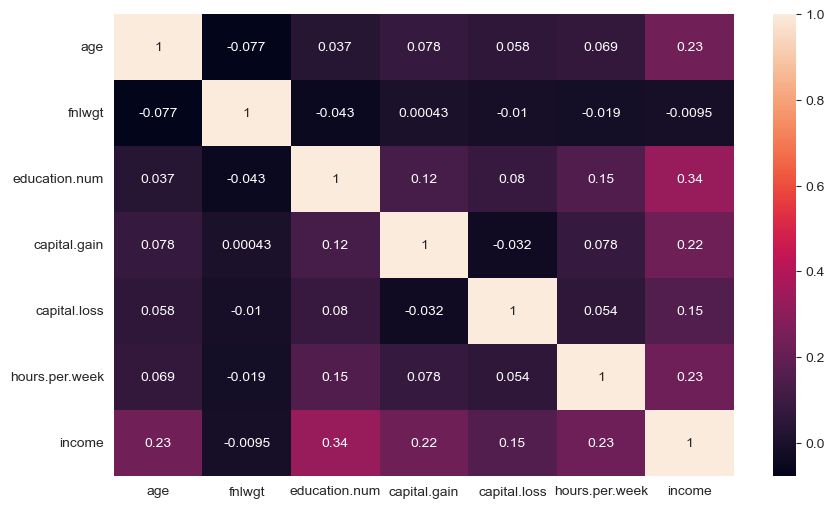

In [22]:
sns.heatmap(df_numeric.corr(), annot=True);

In [23]:
df_numeric.corr()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,income
age,1.00,-0.08,0.04,0.08,0.06,0.07,0.23
fnlwgt,-0.08,1.00,-0.04,0.00,-0.01,-0.02,-0.01
education.num,0.04,-0.04,1.00,0.12,0.08,0.15,0.34
capital.gain,0.08,0.00,0.12,1.00,-0.03,0.08,0.22
capital.loss,0.06,-0.01,0.08,-0.03,1.00,0.05,0.15
hours.per.week,0.07,-0.02,0.15,0.08,0.05,1.00,0.23
income,0.23,-0.01,0.34,0.22,0.15,0.23,1.00


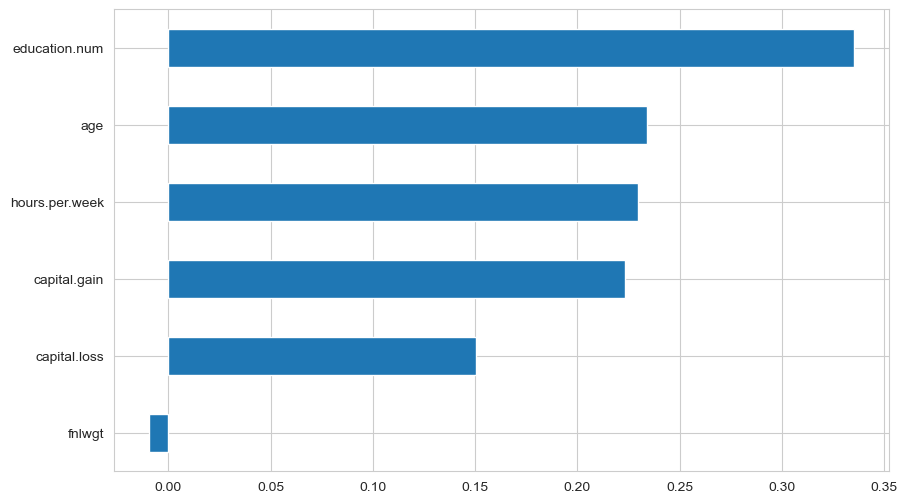

In [24]:
df_numeric.corr()["income"].drop("income").sort_values().plot.barh();

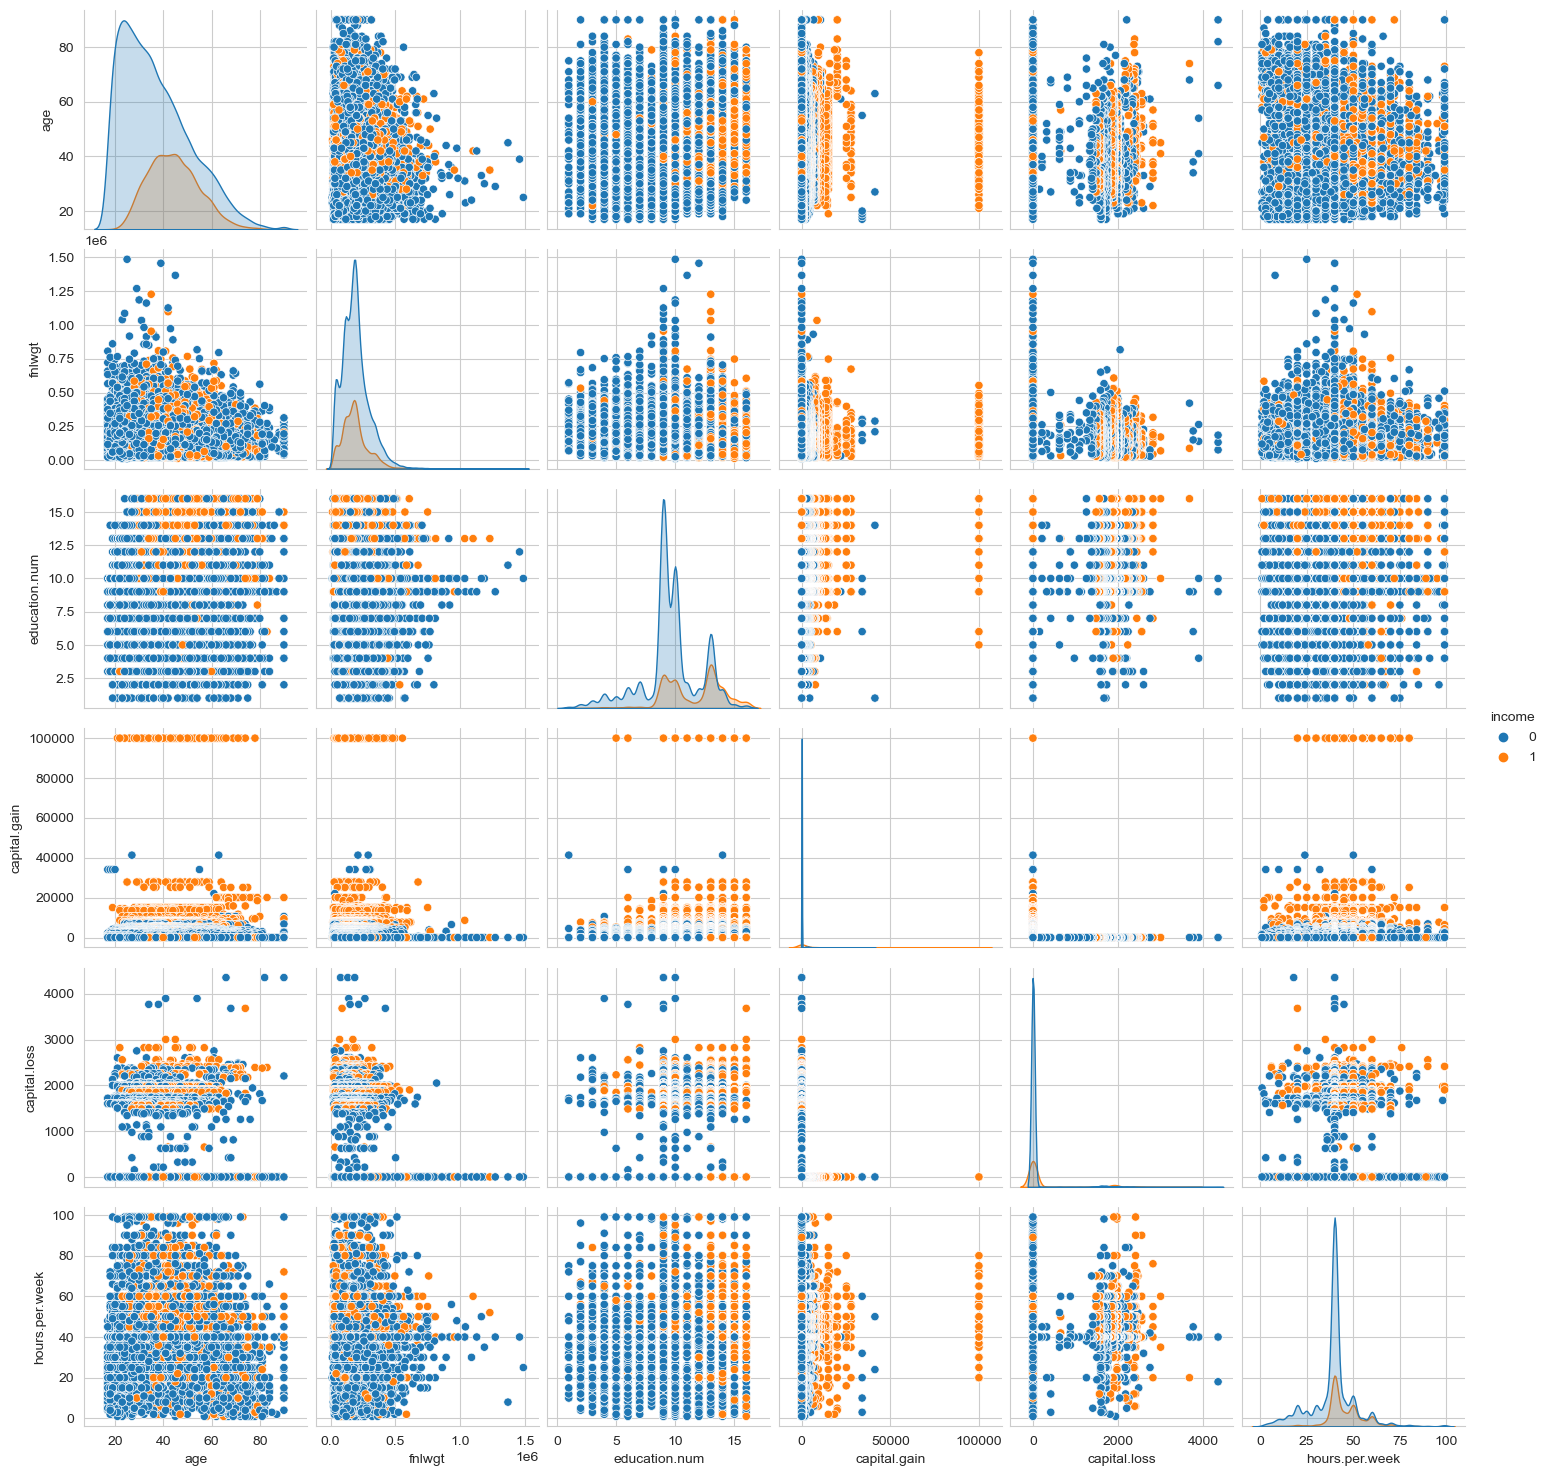

In [25]:
sns.pairplot(df, hue = "income");

In [26]:
# index = 0
# plt.figure(figsize=(20,20))
# for feature in df_numeric.columns:
#     if feature != "income":
#         index += 1
#         plt.subplot(3,3,index)
#         sns.boxplot(x='income',y=feature,data=df_numeric)
# plt.show()

In [27]:
df.drop("education.num", axis= 1, inplace = True)

In [28]:
df.education.unique()

array(['HS-grad', 'Some-college', '7th-8th', '10th', 'Doctorate',
       'Prof-school', 'Bachelors', 'Masters', '11th', 'Assoc-acdm',
       'Assoc-voc', '1st-4th', '5th-6th', '12th', '9th', 'Preschool'],
      dtype=object)

In [29]:
df.education=df.education.str.replace("Preschool", "0").str.replace("5th-6th","1").str.replace("7th-8th","2")

In [30]:
df.education

0             HS-grad
1             HS-grad
2        Some-college
3                   2
4        Some-college
             ...     
32556    Some-college
32557      Assoc-acdm
32558         HS-grad
32559         HS-grad
32560         HS-grad
Name: education, Length: 32561, dtype: object

In [31]:
df.education=df.education.str.replace("Assoc-voc", "4").str.replace("Assoc-acdm","4")

In [32]:
df.education=df.education.str.replace("Bachelors", "5").str.replace("Prof-school","5").str.replace("Masters","6").str.replace("Doctorate","7").str.replace("1st-4th","1")

In [33]:
df.education=df.education.str.replace("HS-grad", "3").str.replace("Some-college","3").str.replace("10th","3").str.replace("11th","3").str.replace("12th","1").str.replace("9th","3")

In [34]:
df.education = df.education.astype(int)

In [35]:
df.education.unique()

array([3, 2, 7, 5, 6, 4, 1, 0])

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  int32 
 4   marital.status  32561 non-null  object
 5   occupation      32561 non-null  object
 6   relationship    32561 non-null  object
 7   race            32561 non-null  object
 8   sex             32561 non-null  object
 9   capital.gain    32561 non-null  int64 
 10  capital.loss    32561 non-null  int64 
 11  hours.per.week  32561 non-null  int64 
 12  native.country  32561 non-null  object
 13  income          32561 non-null  int32 
dtypes: int32(2), int64(5), object(7)
memory usage: 3.2+ MB


In [37]:
df.relationship=df.relationship.replace(["Not-in-family", "Other-relative"], "Unmarried")

In [38]:
df.relationship.unique()

array(['Unmarried', 'Own-child', 'Husband', 'Wife'], dtype=object)

In [39]:
df.relationship=df.relationship.replace(["Husband", "Wife"], "married")

In [40]:
df.relationship.unique()

array(['Unmarried', 'Own-child', 'married'], dtype=object)

In [41]:
df.occupation.nunique()

15

In [42]:
df2=pd.get_dummies(df["occupation"], drop_first=True)

In [43]:
df2

,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving,Unknown
0,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,False,False,True,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,True,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,False,False,False,False,False,False,False,False,False,True,False,False,False,False
32557,False,False,False,False,False,False,False,False,False,False,False,True,False,False
32558,False,False,False,False,False,True,False,False,False,False,False,False,False,False
32559,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [44]:
bool_columns = df2.columns[df2.dtypes == 'bool']
df2[bool_columns] = df2[bool_columns].astype(int)

In [45]:
df2

,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving,Unknown
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0,0,0,0,0,0,0,0,0,1,0,0,0,0
32557,0,0,0,0,0,0,0,0,0,0,0,1,0,0
32558,0,0,0,0,0,1,0,0,0,0,0,0,0,0
32559,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [46]:
df.drop("occupation",axis=1)

,age,workclass,fnlwgt,education,marital.status,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Unknown,77053,3,Widowed,Unmarried,White,Female,0,4356,40,United-States,0
1,82,Private,132870,3,Widowed,Unmarried,White,Female,0,4356,18,United-States,0
2,66,Unknown,186061,3,Widowed,Unmarried,Black,Female,0,4356,40,United-States,0
3,54,Private,140359,2,Divorced,Unmarried,White,Female,0,3900,40,United-States,0
4,41,Private,264663,3,Separated,Own-child,White,Female,0,3900,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,3,Never-married,Unmarried,White,Male,0,0,40,United-States,0
32557,27,Private,257302,4,Married-civ-spouse,married,White,Female,0,0,38,United-States,0
32558,40,Private,154374,3,Married-civ-spouse,married,White,Male,0,0,40,United-States,1
32559,58,Private,151910,3,Widowed,Unmarried,White,Female,0,0,40,United-States,0


In [47]:
df_yeni=pd.concat([df,df2],axis=1)

In [48]:
df_yeni

,age,workclass,fnlwgt,education,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving,Unknown
0,90,Unknown,77053,3,Widowed,Unknown,Unmarried,White,Female,0,4356,40,United-States,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,82,Private,132870,3,Widowed,Exec-managerial,Unmarried,White,Female,0,4356,18,United-States,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,66,Unknown,186061,3,Widowed,Unknown,Unmarried,Black,Female,0,4356,40,United-States,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,54,Private,140359,2,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,41,Private,264663,3,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,3,Never-married,Protective-serv,Unmarried,White,Male,0,0,40,United-States,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
32557,27,Private,257302,4,Married-civ-spouse,Tech-support,married,White,Female,0,0,38,United-States,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
32558,40,Private,154374,3,Married-civ-spouse,Machine-op-inspct,married,White,Male,0,0,40,United-States,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
32559,58,Private,151910,3,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [49]:
df1=pd.get_dummies(df["relationship"], drop_first=True)

In [50]:
bool_columns = df1.columns[df1.dtypes == 'bool']
df1[bool_columns] = df1[bool_columns].astype(int)

In [51]:
df1

,Unmarried,married
0,1,0
1,1,0
2,1,0
3,1,0
4,0,0
...,...,...
32556,1,0
32557,0,1
32558,0,1
32559,1,0


In [52]:
df=pd.concat([df_yeni,df1],axis=1)

In [53]:
df0=pd.get_dummies(df["sex"], drop_first=True)

In [54]:
bool_columns = df0.columns[df0.dtypes == 'bool']
df0[bool_columns] = df0[bool_columns].astype(int)

In [55]:
df=pd.concat([df,df0],axis=1)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                32561 non-null  int64 
 1   workclass          32561 non-null  object
 2   fnlwgt             32561 non-null  int64 
 3   education          32561 non-null  int32 
 4   marital.status     32561 non-null  object
 5   occupation         32561 non-null  object
 6   relationship       32561 non-null  object
 7   race               32561 non-null  object
 8   sex                32561 non-null  object
 9   capital.gain       32561 non-null  int64 
 10  capital.loss       32561 non-null  int64 
 11  hours.per.week     32561 non-null  int64 
 12  native.country     32561 non-null  object
 13  income             32561 non-null  int32 
 14  Armed-Forces       32561 non-null  int32 
 15  Craft-repair       32561 non-null  int32 
 16  Exec-managerial    32561 non-null  int32

In [57]:
df=df.select_dtypes(include="number")

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   age                32561 non-null  int64
 1   fnlwgt             32561 non-null  int64
 2   education          32561 non-null  int32
 3   capital.gain       32561 non-null  int64
 4   capital.loss       32561 non-null  int64
 5   hours.per.week     32561 non-null  int64
 6   income             32561 non-null  int32
 7   Armed-Forces       32561 non-null  int32
 8   Craft-repair       32561 non-null  int32
 9   Exec-managerial    32561 non-null  int32
 10  Farming-fishing    32561 non-null  int32
 11  Handlers-cleaners  32561 non-null  int32
 12  Machine-op-inspct  32561 non-null  int32
 13  Other-service      32561 non-null  int32
 14  Priv-house-serv    32561 non-null  int32
 15  Prof-specialty     32561 non-null  int32
 16  Protective-serv    32561 non-null  int32
 17  Sales       

<Axes: >

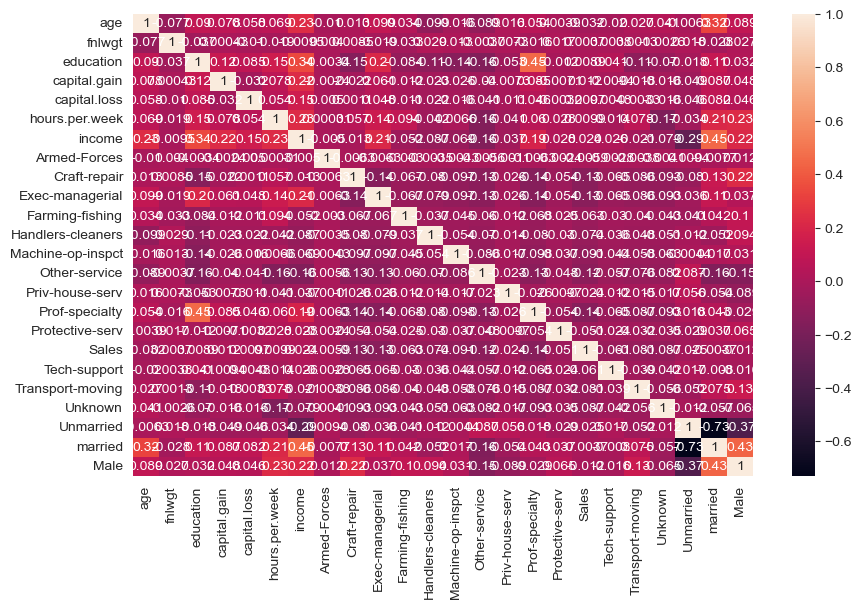

In [59]:
sns.heatmap(df.corr(), annot=True)

### Feature Engineering

In [60]:
df.corr()[(df.corr()>= 0.9) & (df.corr() < 1)].any().any()# multicollinearity varlığı

False

In [61]:
corr_by_Class = df.corr()["income"].sort_values()[:-1]
corr_by_Class # datamızdaki tüm featurların target ile olan corr.larına bakıyoruz

Unmarried           -0.29
Other-service       -0.16
Handlers-cleaners   -0.09
Unknown             -0.08
Machine-op-inspct   -0.07
Farming-fishing     -0.05
Priv-house-serv     -0.04
Transport-moving    -0.02
Craft-repair        -0.01
fnlwgt              -0.01
Armed-Forces        -0.01
Sales                0.02
Tech-support         0.03
Protective-serv      0.03
capital.loss         0.15
Prof-specialty       0.19
Exec-managerial      0.21
Male                 0.22
capital.gain         0.22
hours.per.week       0.23
age                  0.23
education            0.34
married              0.45
Name: income, dtype: float64

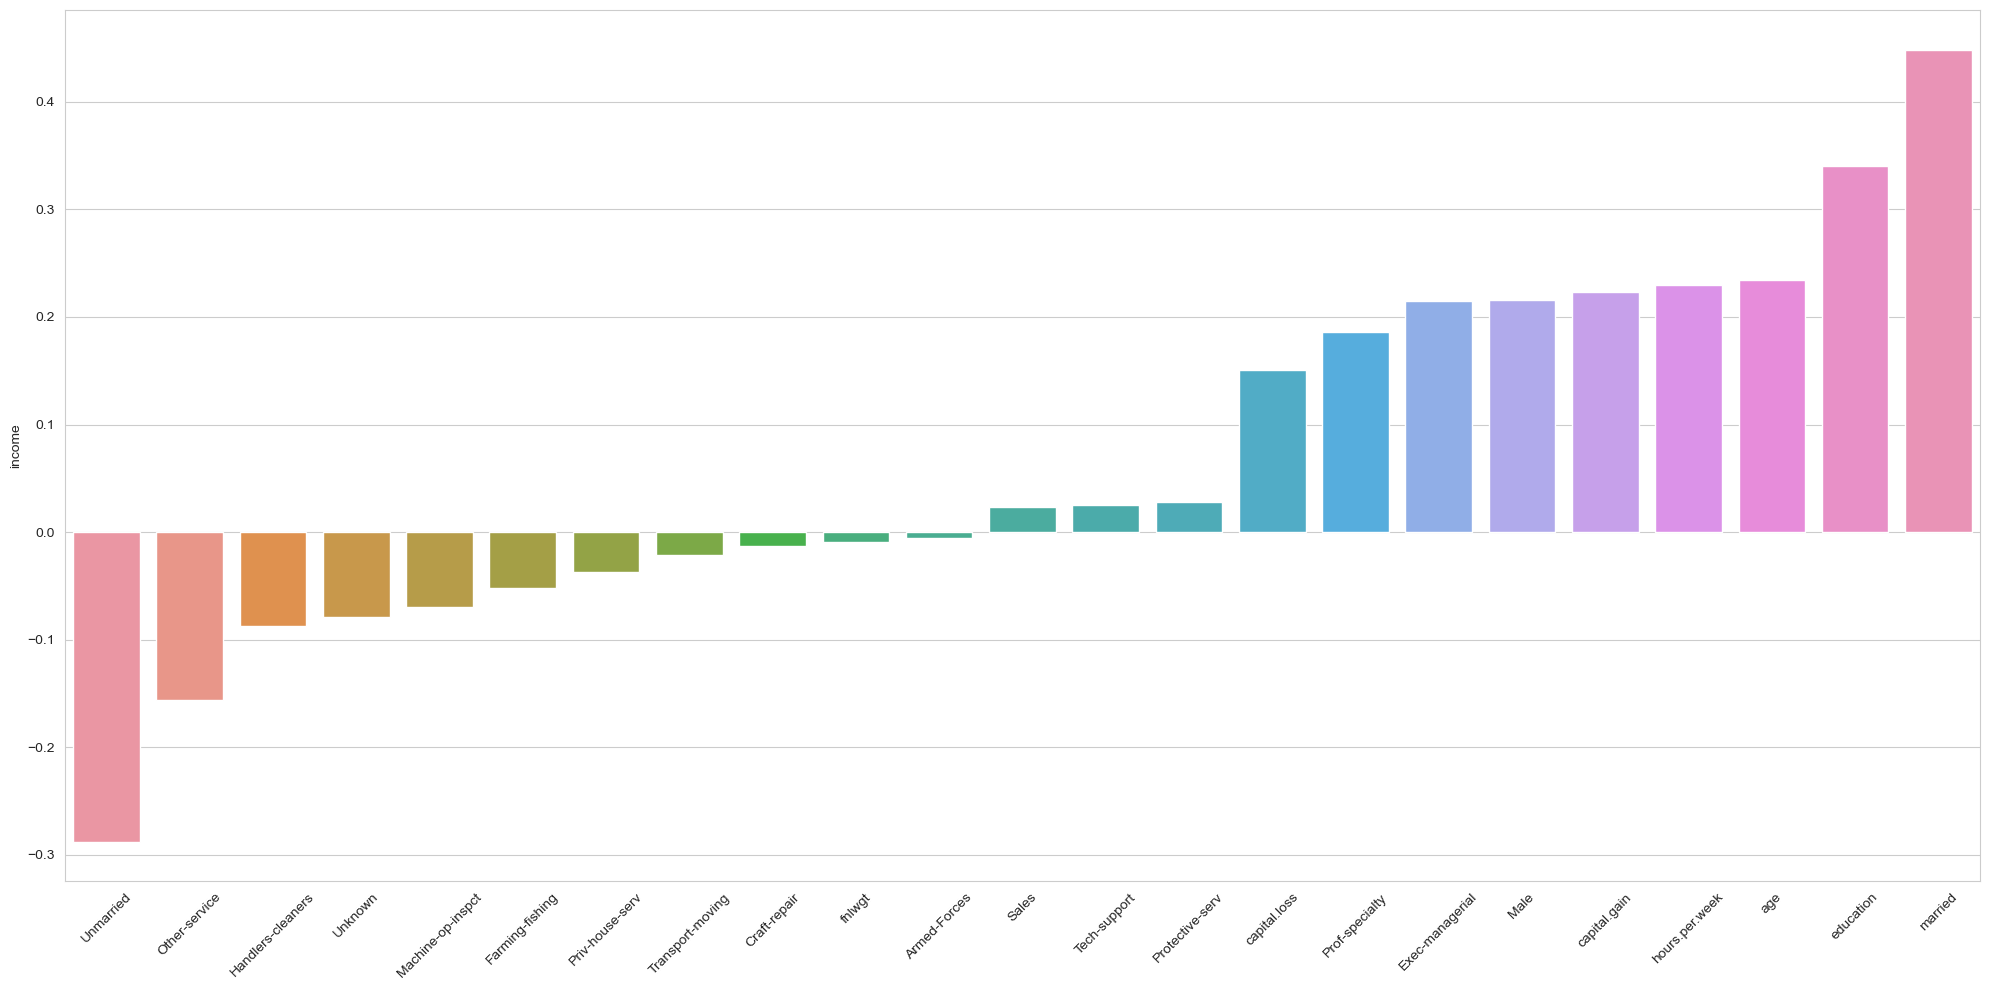

In [62]:
plt.figure(figsize = (20,10))
sns.barplot(x = corr_by_Class.index, y = corr_by_Class)
plt.xticks(rotation=45)
plt.tight_layout();

# Logistic Regression

### Target ve Features Ayır

In [63]:
X = df.drop("income", axis=1)
y = df["income"]

### Train | Test Split

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.1,
                                                    stratify=y,
                                                    random_state=42)

### Scaling

In [66]:
from sklearn.preprocessing import StandardScaler

In [67]:
scaler = StandardScaler()

In [68]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Modelling

In [69]:
from sklearn.linear_model import LogisticRegression

In [70]:
log_model = LogisticRegression()

In [71]:
log_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [72]:
y_pred = log_model.predict(X_test_scaled)
y_pred_proba = log_model.predict_proba(X_test_scaled)

In [73]:
test_data = pd.concat([X_test, y_test], axis = 1)
test_data["pred"] = y_pred
test_data["pred_proba"] = y_pred_proba[:, 1]
test_data.sample(20)

,age,fnlwgt,education,capital.gain,capital.loss,hours.per.week,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving,Unknown,Unmarried,married,Male,income,pred,pred_proba
14858,21,204596,4,0,0,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00
19304,76,84755,3,0,0,40,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0.03
19992,45,71823,3,0,0,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0.18
9797,20,49179,3,0,0,35,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0.03
11147,29,110134,3,0,0,40,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0.02
28462,35,265662,5,0,0,40,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,1,0.52
19664,17,140027,3,0,0,25,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.00
19027,32,94041,4,0,0,44,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0.05
3766,39,160728,3,2977,0,40,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0.05
30496,43,193459,3,0,0,40,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0.14


### Model Performance on Classification Tasks

In [74]:
from sklearn.metrics import confusion_matrix, classification_report

In [75]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [76]:
eval_metric(log_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[2308  165]
 [ 321  463]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      2473
           1       0.74      0.59      0.66       784

    accuracy                           0.85      3257
   macro avg       0.81      0.76      0.78      3257
weighted avg       0.84      0.85      0.84      3257


Train_Set
[[20768  1479]
 [ 2936  4121]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.90     22247
           1       0.74      0.58      0.65      7057

    accuracy                           0.85     29304
   macro avg       0.81      0.76      0.78     29304
weighted avg       0.84      0.85      0.84     29304



### Cross Validate

In [77]:
from sklearn.model_selection import cross_validate

In [78]:
model = LogisticRegression()

scores = cross_validate(model, X_train_scaled, y_train, scoring=["precision",
                                                                "recall",
                                                                "f1",
                                                                "accuracy"], cv = 10)

df_scores = pd.DataFrame(scores, index = range(1,11))

In [79]:
df_scores.mean()[2:]

test_precision   0.74
test_recall      0.58
test_f1          0.65
test_accuracy    0.85
dtype: float64

### GridSearchCV

In [80]:
from sklearn.model_selection import GridSearchCV

In [81]:
model = LogisticRegression()

penalty = ["l1", "l2"]
C = np.logspace(-1, 5, 10)
class_weight = [None, "balanced"]
solver = ["lbfgs", "liblinear", "sag", "saga"]

param_grid = {"penalty":penalty,
             "C": C,
             "class_weight": class_weight,
             "solver": solver}
grid_model = GridSearchCV(estimator=model,
                         param_grid=param_grid,
                         cv=10, scoring="recall",
                         n_jobs=-1)

In [82]:
grid_model.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.00000000e-01, 4.64158883e-01, 2.15443469e+00, 1.00000000e+01,
       4.64158883e+01, 2.15443469e+02, 1.00000000e+03, 4.64158883e+03,
       2.15443469e+04, 1.00000000e+05]),
                         'class_weight': [None, 'balanced'],
                         'penalty': ['l1', 'l2'],
                         'solver': ['lbfgs', 'liblinear', 'sag', 'saga']},
             scoring='recall')

In [83]:
grid_model.best_params_

{'C': 0.1, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear'}

In [84]:
eval_metric(grid_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[1983  490]
 [ 144  640]]
              precision    recall  f1-score   support

           0       0.93      0.80      0.86      2473
           1       0.57      0.82      0.67       784

    accuracy                           0.81      3257
   macro avg       0.75      0.81      0.77      3257
weighted avg       0.84      0.81      0.82      3257


Train_Set
[[17712  4535]
 [ 1164  5893]]
              precision    recall  f1-score   support

           0       0.94      0.80      0.86     22247
           1       0.57      0.84      0.67      7057

    accuracy                           0.81     29304
   macro avg       0.75      0.82      0.77     29304
weighted avg       0.85      0.81      0.82     29304



### ROC (Receiver Operating Charecterictic) Curve and AUC (Area Under Curve)

In [85]:
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay, precision_recall_curve, roc_auc_score, auc, roc_curve, average_precision_score

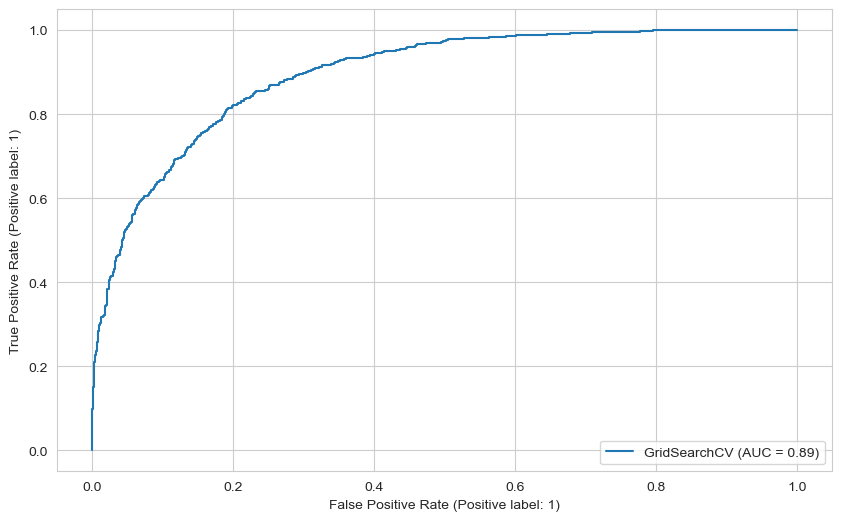

In [86]:
RocCurveDisplay.from_estimator(grid_model, X_test_scaled, y_test)

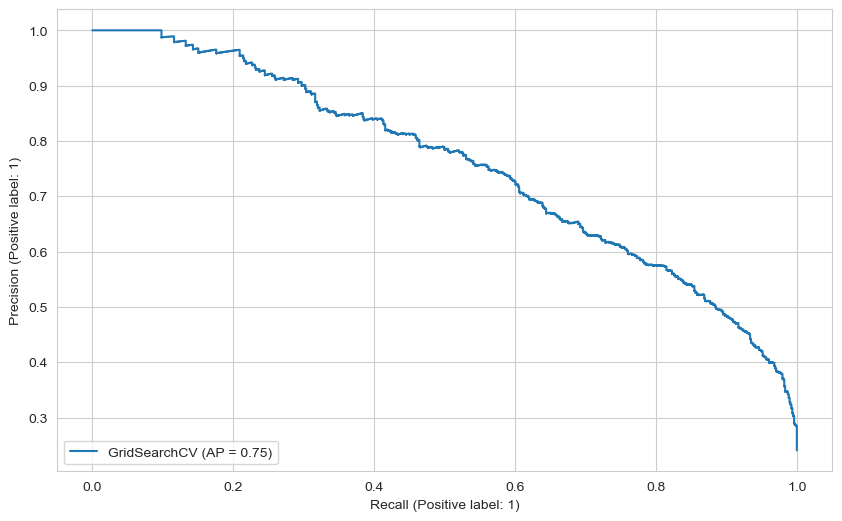

In [87]:
PrecisionRecallDisplay.from_estimator(grid_model, X_test_scaled, y_test)

In [88]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

### LogModel matrix

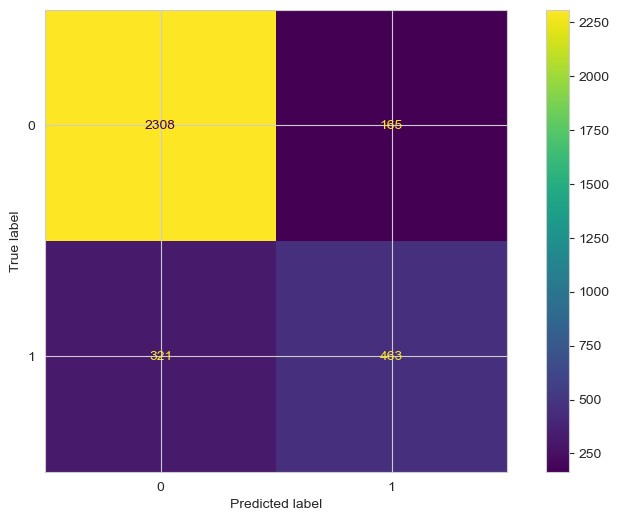

In [89]:
ConfusionMatrixDisplay.from_estimator(log_model, X_test_scaled, y_test)
plt.show()

### GridModel Matrix

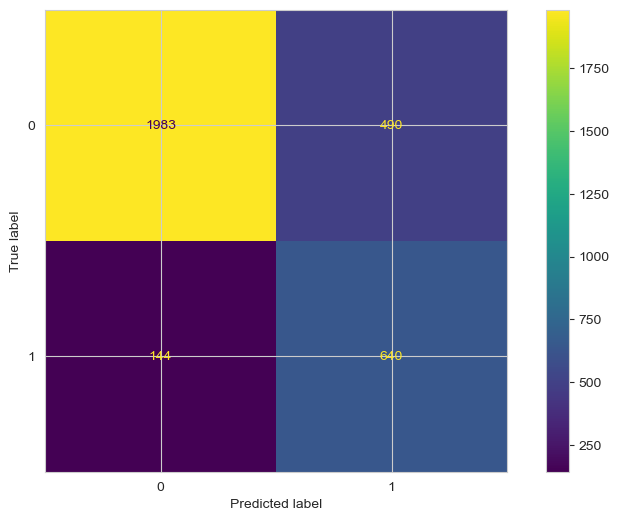

In [90]:
ConfusionMatrixDisplay.from_estimator(grid_model, X_test_scaled, y_test)
plt.show()

In [91]:
test_data = pd.concat([X_test, y_test], axis = 1)
test_data

,age,fnlwgt,education,capital.gain,capital.loss,hours.per.week,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving,Unknown,Unmarried,married,Male,income
26410,22,147253,3,0,0,15,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0
8110,53,143822,6,0,0,36,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1
30930,70,133536,3,0,0,28,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0
23211,22,88126,3,0,0,40,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
18594,25,189027,5,0,0,40,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7518,19,423863,3,0,0,35,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
6145,60,131852,1,0,0,30,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1
17114,56,197114,3,0,0,28,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
18396,41,205153,4,0,0,40,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0


In [92]:
test_data["pred_proba"] = y_pred_proba[:,1]
test_data

,age,fnlwgt,education,capital.gain,capital.loss,hours.per.week,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving,Unknown,Unmarried,married,Male,income,pred_proba
26410,22,147253,3,0,0,15,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0.00
8110,53,143822,6,0,0,36,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,0.75
30930,70,133536,3,0,0,28,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0.19
23211,22,88126,3,0,0,40,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0.00
18594,25,189027,5,0,0,40,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7518,19,423863,3,0,0,35,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.00
6145,60,131852,1,0,0,30,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,0.07
17114,56,197114,3,0,0,28,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0.01
18396,41,205153,4,0,0,40,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0.56


In [93]:
test_data["pred"] = y_pred
test_data

,age,fnlwgt,education,capital.gain,capital.loss,hours.per.week,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving,Unknown,Unmarried,married,Male,income,pred_proba,pred
26410,22,147253,3,0,0,15,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0.00,0
8110,53,143822,6,0,0,36,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,0.75,1
30930,70,133536,3,0,0,28,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0.19,0
23211,22,88126,3,0,0,40,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0.00,0
18594,25,189027,5,0,0,40,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0.01,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7518,19,423863,3,0,0,35,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.00,0
6145,60,131852,1,0,0,30,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,0.07,0
17114,56,197114,3,0,0,28,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0.01,0
18396,41,205153,4,0,0,40,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0.56,1


In [94]:
## sadece hatalı tahminlerin listelenmesi

In [95]:
test_data[((test_data["income"]==1) & (test_data["pred"]==0)) | ((test_data["income"]==0) & (test_data["pred"]==1))]

,age,fnlwgt,education,capital.gain,capital.loss,hours.per.week,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving,Unknown,Unmarried,married,Male,income,pred_proba,pred
22133,26,222539,3,0,0,40,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0.19,0
4390,40,286370,2,0,0,40,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,1,0.12,0
20692,47,128796,3,0,0,40,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0.27,0
287,28,175262,4,0,2002,40,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0.72,1
3120,60,160625,3,5013,0,40,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0.81,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15008,41,57233,5,0,0,70,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0.73,1
19830,33,242150,4,0,0,50,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0.57,1
14448,54,326156,3,0,0,40,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0.32,0
6145,60,131852,1,0,0,30,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,0.07,0


In [96]:
y_pred_proba_2 = grid_model.predict_proba(X_test_scaled)
y_pred_proba_2

array([[0.9897058 , 0.0102942 ],
       [0.08965416, 0.91034584],
       [0.55839993, 0.44160007],
       ...,
       [0.98143933, 0.01856067],
       [0.20227359, 0.79772641],
       [0.0430289 , 0.9569711 ]])

In [97]:
test_data_2 = pd.concat([X_test, y_test], axis = 1)
test_data_2

,age,fnlwgt,education,capital.gain,capital.loss,hours.per.week,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving,Unknown,Unmarried,married,Male,income
26410,22,147253,3,0,0,15,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0
8110,53,143822,6,0,0,36,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1
30930,70,133536,3,0,0,28,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0
23211,22,88126,3,0,0,40,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
18594,25,189027,5,0,0,40,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7518,19,423863,3,0,0,35,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
6145,60,131852,1,0,0,30,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1
17114,56,197114,3,0,0,28,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
18396,41,205153,4,0,0,40,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0


In [98]:
test_data_2["pred_proba_2"] = y_pred_proba_2[:,1]
test_data_2

,age,fnlwgt,education,capital.gain,capital.loss,hours.per.week,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving,Unknown,Unmarried,married,Male,income,pred_proba_2
26410,22,147253,3,0,0,15,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0.01
8110,53,143822,6,0,0,36,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,0.91
30930,70,133536,3,0,0,28,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0.44
23211,22,88126,3,0,0,40,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0.01
18594,25,189027,5,0,0,40,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7518,19,423863,3,0,0,35,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.01
6145,60,131852,1,0,0,30,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,0.19
17114,56,197114,3,0,0,28,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0.02
18396,41,205153,4,0,0,40,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0.80


In [99]:
test_data_2["pred"] = y_pred_2
test_data_2

NameError: name 'y_pred_2' is not defined

In [ ]:
test_data_2[((test_data_2["income"]==1) & (test_data_2["pred"]==0)) | ((test_data_2["income"]==0) & (test_data_2["pred"]==1))]

In [ ]:
y_pred_2 = grid_model.predict(X_test_scaled)

# K-Nearest Neighbors (KNN) Classification

### Modeling

In [ ]:
sayac = 1
for k in range(1,25):
    knn_yeni = KNeighborsClassifier(n_neighbors = k)
    knn_yeni.fit(X_train_scaled,y_train)
    print(sayac, "  ", "Doğruluk oranı: %", knn_yeni.score(X_test_scaled,y_test)*100)
    sayac += 1

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=20)

In [ ]:
knn_model.fit(X_train_scaled, y_train)

In [ ]:
y_pred_knn = knn_model.predict(X_test_scaled)
y_pred_knn

In [ ]:
y_pred_knn_proba = knn_model.predict_proba(X_test_scaled)

In [ ]:
pd.DataFrame(y_pred_knn_proba)

In [ ]:
import mglearn

In [ ]:
mglearn.plots.plot_knn_classification(n_neighbors = 5)

In [ ]:
my_dict = {"Actual": y_test, "Pred":y_pred_knn, "Proba_1":y_pred_knn_proba[:,1], "Proba_0":y_pred_knn_proba[:,0]}

In [ ]:
pd.DataFrame.from_dict(my_dict).sample(10)

### Model Performance on Classification Task

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

In [ ]:
ConfusionMatrixDisplay.from_estimator(knn_model, X_test_scaled, y_test);

In [ ]:
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

### Cross Validate For Optimal K Value

In [ ]:
from sklearn.model_selection import cross_val_score, cross_validate

In [ ]:
model = KNeighborsClassifier(n_neighbors=20)

scores = cross_validate(model, X_train_scaled, y_train, scoring= ["accuracy", "precision", "recall", "f1"], cv= 10)

df_scores = pd.DataFrame(scores, index=range(1,11))
df_scores

In [ ]:
df_scores.mean()[2:]

### GridSearch

In [ ]:
knn_grid = KNeighborsClassifier()

In [ ]:
n_neighbors = range(1,30)

In [ ]:
param_grid = {"n_neighbors":n_neighbors, "p": [1, 2], "weights": ["uniform", "distance"]}

In [ ]:
knn_grid_model = GridSearchCV(knn_grid, param_grid, cv = 10, scoring = "f1")

In [ ]:
knn_grid_model.fit(X_train_scaled, y_train)

In [ ]:
knn_grid_model.best_params_

In [ ]:
print("WITH K=9\n")
eval_metric(knn_grid_model, X_train_scaled, y_train, X_test_scaled, y_test)

In [ ]:
ConfusionMatrixDisplay.from_estimator(knn_grid_model, X_test_scaled, y_test);

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors = 20).fit(X_train_scaled, y_train)

In [ ]:
RocCurveDisplay.from_estimator(knn_model, X_test_scaled, y_test);

In [ ]:
y_pred_proba = knn_model.predict_proba(X_test_scaled)
roc_auc_score(y_test, y_pred_proba[:,1])

# Support Vector Classifier

In [ ]:
from sklearn.svm import SVC

In [ ]:
model_svc = SVC()

In [ ]:
model_svc.fit(X, y)

In [ ]:
svm = SVC()
param_grid = { "C": [0.01, 0.1, 1, 10, 1000],
             "kernel": ["linear", "rbf", "sigmoid", "poly"],
             "gamma": ["scale", "auto", 0.1, 1],
             "degree": [1,2,3]}
grid_svm = GridSearchCV(svm, param_grid)

In [ ]:
grid_svm.fit(X_train_scaled, y_train)